<a href="https://colab.research.google.com/github/almachn/05.-C/blob/main/T01_Pengolahan_Citra_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

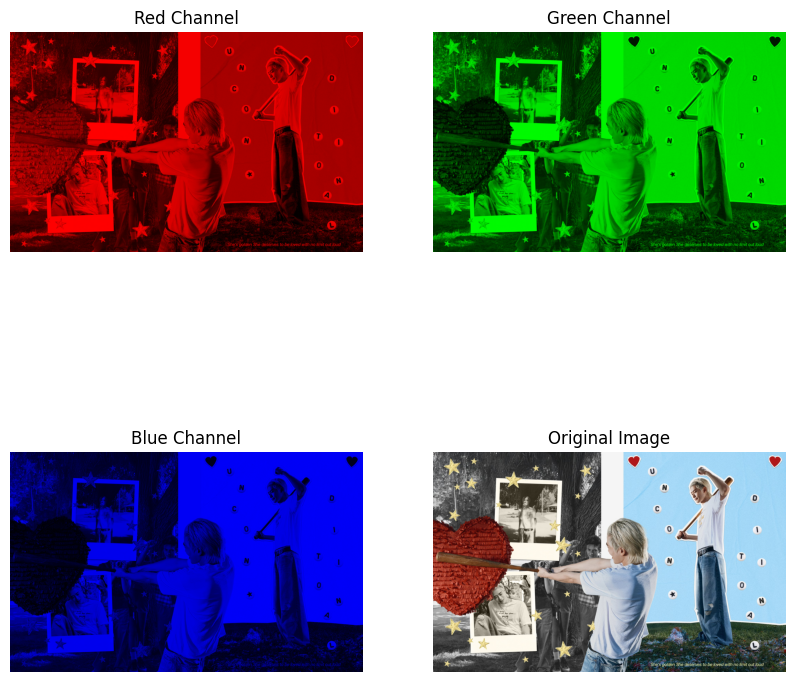

In [4]:
#dekomposisi R, G, B dari citra berwarna
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load an image (Replace the path with the actual image file path)
image_path = '/content/jae.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Step 2: Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)

# Step 4: Create a zero matrix to help in visualization
zeros = np.zeros(image.shape[:2], dtype="uint8")

# Step 5: Visualize the R, G, B channels separately
plt.figure(figsize=(10, 10))

# Red channel
plt.subplot(2, 2, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(2, 2, 2)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 3)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel')
plt.axis('off')

# Original image for comparison
plt.subplot(2, 2, 4)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.show()

**ANALISIS KODE PROGRAM**

Program ini memisahkan gambar menjadi tiga kanal warna (R, G, B) dan menampilkan masing-masing kanal secara terpisah. Hal ini berguna untuk memahami bagaimana setiap warna berkontribusi terhadap gambar penuh.
  
Dengan memisahkan gambar menjadi tiga bagian berdasarkan warnanya, kita dapat melihat bagaimana intensitas warna di masing-masing kanal. Kanal ini disatukan kembali menggunakan matriks nol untuk memudahkan visualisasi. Pada akhirnya, kita dapat membandingkan citra asli dengan komponen warna individualnya.

 1. **Memuat Gambar Menggunakan OpenCV**:
   ```python
   image = cv2.imread(image_path)
   ```
   - **Penjelasan**: Fungsi `cv2.imread()` digunakan untuk membaca atau memuat gambar dari lokasi yang ditentukan oleh variabel `image_path`. Secara default, gambar dimuat dalam format warna BGR (Blue, Green, Red).

2. **Mengonversi Gambar dari BGR ke RGB**:
   ```python
   image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   ```
   - **Penjelasan**: Karena OpenCV memuat gambar dalam format BGR (Blue-Green-Red), kita harus mengonversinya ke format RGB (Red-Green-Blue) untuk menampilkan gambar dengan benar menggunakan `matplotlib`, yang mengharapkan format RGB. Fungsi `cv2.cvtColor()` digunakan untuk konversi ini.

3. **Memisahkan Gambar Menjadi Kanal R (Merah), G (Hijau), dan B (Biru)**:
   ```python
   R, G, B = cv2.split(image_rgb)
   ```
   - **Penjelasan**: Fungsi `cv2.split()` memisahkan gambar menjadi tiga kanal terpisah, yaitu kanal Merah (R), Hijau (G), dan Biru (B). Setiap kanal ini adalah gambar hitam putih yang hanya menunjukkan warna tertentu.

 4. **Membuat Matriks Nol**:
   ```python
   zeros = np.zeros(image.shape[:2], dtype="uint8")
   ```
   - **Penjelasan**: Matriks nol (`zeros`) dibuat dengan ukuran yang sama dengan gambar asli, tetapi hanya memiliki satu kanal. Matriks ini digunakan untuk membantu visualisasi dengan mengisi kanal warna lainnya (selain kanal yang sedang ditampilkan) dengan nilai nol, yang berarti hitam.

### 5. **Visualisasi Masing-Masing Kanal Warna**:
   - **Kanal Merah (R)**:
     ```python
     red_image = cv2.merge([R, zeros, zeros])
     ```
     - **Penjelasan**: Gambar dengan kanal merah ditampilkan dengan nilai-nilai pada kanal hijau dan biru diatur menjadi nol (hitam). Hanya intensitas warna merah yang terlihat pada gambar ini.
     
   - **Kanal Hijau (G)**:
     ```python
     green_image = cv2.merge([zeros, G, zeros])
     ```
     - **Penjelasan**: Gambar dengan kanal hijau ditampilkan, di mana kanal merah dan biru diisi dengan nilai nol, sehingga hanya warna hijau yang terlihat.

   - **Kanal Biru (B)**:
     ```python
     blue_image = cv2.merge([zeros, zeros, B])
     ```
     - **Penjelasan**: Gambar dengan kanal biru ditampilkan, dengan dua kanal lainnya (merah dan hijau) diisi dengan nilai nol. Hanya warna biru yang terlihat pada gambar ini.

   - **Gambar Asli**:
     ```python
     plt.imshow(image_rgb)
     ```
     - **Penjelasan**: Gambar asli ditampilkan dalam format RGB untuk memberikan perbandingan dengan gambar-gambar yang hanya menampilkan satu kanal warna.

 6. **Menampilkan Semua Gambar**:
   ```python
   plt.show()
   ```
   - **Penjelasan**: Fungsi `plt.show()` menampilkan semua gambar yang telah diatur pada plot. Anda akan melihat gambar dengan kanal merah, hijau, biru, serta gambar asli di jendela yang sama.





<ipython-input-5-b7cf0c049df0>:29: RuntimeWarning: divide by zero encountered in log
  log_mapped = c * (np.log(channel + 1))


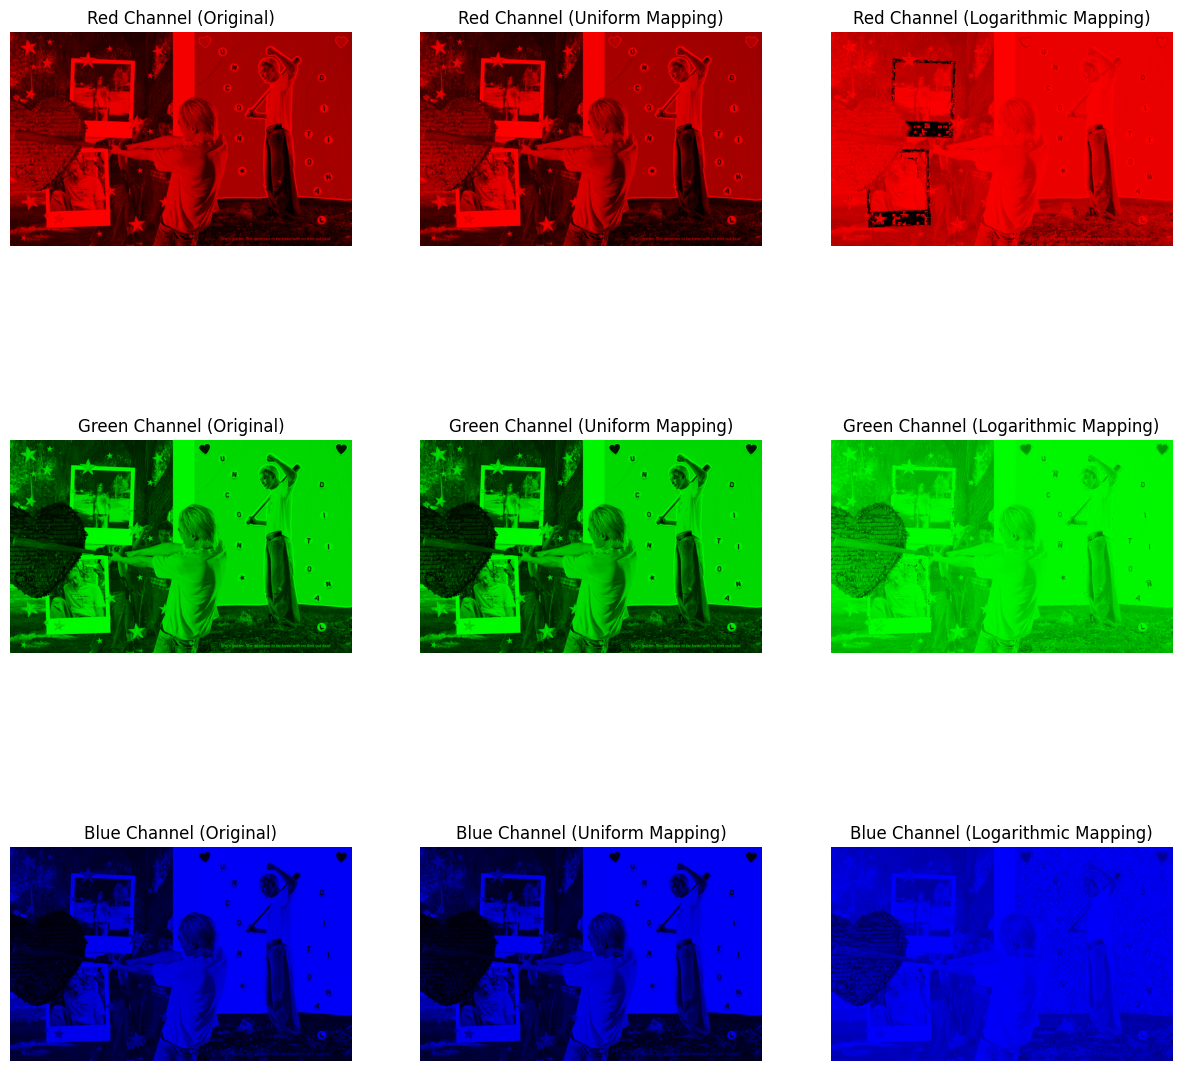

In [5]:
#Uniform Mapping dan Logarithmic Mapping
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load an image (Replace the path with the actual image file path)
image_path = '/content/jae.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Step 2: Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)

# Step 4: Create a zero matrix to help in visualization
zeros = np.zeros(image.shape[:2], dtype="uint8")

# Uniform Mapping (Normalize intensity between 0 and 255)
def uniform_mapping(channel):
    return cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)

# Logarithmic Mapping
def logarithmic_mapping(channel):
    c = 255 / np.log(1 + np.max(channel))
    log_mapped = c * (np.log(channel + 1))
    return np.array(log_mapped, dtype=np.uint8)

# Step 5: Apply Uniform and Logarithmic Mapping to each channel
R_uniform = uniform_mapping(R)
G_uniform = uniform_mapping(G)
B_uniform = uniform_mapping(B)

R_log = logarithmic_mapping(R)
G_log = logarithmic_mapping(G)
B_log = logarithmic_mapping(B)

# Step 6: Visualize the R, G, B channels separately and with Uniform/Logarithmic mappings
plt.figure(figsize=(15, 15))

# Original Red channel
plt.subplot(3, 3, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel (Original)')
plt.axis('off')

# Uniform Red
plt.subplot(3, 3, 2)
uniform_red_image = cv2.merge([R_uniform, zeros, zeros])
plt.imshow(uniform_red_image)
plt.title('Red Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Red
plt.subplot(3, 3, 3)
log_red_image = cv2.merge([R_log, zeros, zeros])
plt.imshow(log_red_image)
plt.title('Red Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Green channel
plt.subplot(3, 3, 4)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel (Original)')
plt.axis('off')

# Uniform Green
plt.subplot(3, 3, 5)
uniform_green_image = cv2.merge([zeros, G_uniform, zeros])
plt.imshow(uniform_green_image)
plt.title('Green Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Green
plt.subplot(3, 3, 6)
log_green_image = cv2.merge([zeros, G_log, zeros])
plt.imshow(log_green_image)
plt.title('Green Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Blue channel
plt.subplot(3, 3, 7)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel (Original)')
plt.axis('off')

# Uniform Blue
plt.subplot(3, 3, 8)
uniform_blue_image = cv2.merge([zeros, zeros, B_uniform])
plt.imshow(uniform_blue_image)
plt.title('Blue Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Blue
plt.subplot(3, 3, 9)
log_blue_image = cv2.merge([zeros, zeros, B_log])
plt.imshow(log_blue_image)
plt.title('Blue Channel (Logarithmic Mapping)')
plt.axis('off')

plt.show()

**ANALISIS KODE PROGRAM**

Kode program ini mengambil gambar, memecahnya menjadi tiga warna dasar (merah, hijau, biru), kemudian menerapkan dua jenis teknik pemrosesan gambar yang disebut "pemetaan seragam" dan "pemetaan logaritmik". Tujuannya adalah untuk memperbaiki kualitas gambar dan membuat detailnya lebih mudah dilihat, terutama jika gambar terlalu terang atau terlalu gelap. Program ini berguna untuk meningkatkan kualitas visual gambar, sehingga lebih mudah dianalisis.

   - **Pemetaan Logaritmik**: Menekankan intensitas rendah dan mengurangi intensitas tinggi, yang membuat detail pada bagian gambar yang lebih gelap menjadi lebih terlihat.
   - **Visualisasi**: Dengan menampilkan gambar dalam versi asli, seragam, dan logaritmik, kita bisa membandingkan bagaimana setiap teknik pemetaan mempengaruhi hasil akhir.

1. **Memuat dan Mengonversi Gambar**
   ```python
   image = cv2.imread(image_path)
   image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   R, G, B = cv2.split(image_rgb)
   ```
   - **Penjelasan**: Gambar dimuat dari file menggunakan OpenCV. Karena OpenCV menggunakan format warna BGR (biru-hijau-merah), gambar dikonversi ke format RGB (merah-hijau-biru) agar sesuai dengan format standar yang digunakan dalam pemrograman grafis. Setelah itu, gambar dipisahkan menjadi tiga warna dasar: merah (R), hijau (G), dan biru (B).

2. **Pemetaan Seragam (Uniform Mapping)**
   ```python
   def uniform_mapping(channel):
       return cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)
   ```
   - **Penjelasan**: Fungsi ini melakukan **pemetaan seragam**. Artinya, nilai intensitas setiap piksel warna pada gambar disesuaikan sehingga menyebar secara merata dari nilai terendah (0) hingga tertinggi (255). Ini membantu membuat gambar lebih jelas, terutama jika ada area yang sangat terang atau sangat gelap.
   - **Tujuan**: Untuk membuat gambar lebih jelas dengan menyebarkan kecerahan warna secara lebih merata di seluruh gambar.

3. **Pemetaan Logaritmik (Logarithmic Mapping)**
   ```python
   def logarithmic_mapping(channel):
       c = 255 / np.log(1 + np.max(channel))
       log_mapped = c * (np.log(channel + 1))
       return np.array(log_mapped, dtype=np.uint8)
   ```
   - **Penjelasan**: Fungsi ini menerapkan **pemetaan logaritmik**. Dalam pemetaan ini, intensitas piksel dihitung ulang berdasarkan fungsi logaritma. Logaritma meningkatkan nilai intensitas yang rendah (bagian gelap gambar) dan menekan nilai intensitas tinggi (bagian terang). Ini membuat detail pada area yang lebih gelap lebih terlihat.
   - **Tujuan**: Untuk meningkatkan detail di area gelap pada gambar, dan mengurangi perbedaan yang terlalu besar antara area gelap dan terang.

4. **Penerapan Pemetaan pada Setiap Warna**
   ```python
   R_uniform = uniform_mapping(R)
   G_uniform = uniform_mapping(G)
   B_uniform = uniform_mapping(B)

   R_log = logarithmic_mapping(R)
   G_log = logarithmic_mapping(G)
   B_log = logarithmic_mapping(B)
   ```
   - **Penjelasan**: Pemetaan seragam dan logaritmik diterapkan pada masing-masing warna (merah, hijau, biru) yang menghasilkan tiga versi gambar untuk masing-masing metode pemetaan, sehingga nantinya kita bisa membandingkan hasil dari kedua metode tersebut.
   - **Tujuan**: Agar setiap warna pada gambar bisa dilihat dengan teknik yang berbeda, baik melalui pemetaan seragam maupun logaritmik.

5. **Visualisasi Gambar Asli, Pemetaan Seragam, dan Logaritmik**
   ```python
   plt.figure(figsize=(15, 15))
   
   # Original Red channel
   plt.subplot(3, 3, 1)
   red_image = cv2.merge([R, zeros, zeros])
   plt.imshow(red_image)
   plt.title('Red Channel (Original)')
   plt.axis('off')
   
   # Uniform Red
   plt.subplot(3, 3, 2)
   uniform_red_image = cv2.merge([R_uniform, zeros, zeros])
   plt.imshow(uniform_red_image)
   plt.title('Red Channel (Uniform Mapping)')
   plt.axis('off')
   
   # Logarithmic Red
   plt.subplot(3, 3, 3)
   log_red_image = cv2.merge([R_log, zeros, zeros])
   plt.imshow(log_red_image)
   plt.title('Red Channel (Logarithmic Mapping)')
   plt.axis('off')
   ```
   - **Penjelasan**: Bagian ini menampilkan gambar asli dan hasil pemetaan seragam serta logaritmik untuk setiap warna. Ini memungkinkan kita untuk membandingkan bagaimana tiap metode pemetaan mempengaruhi gambar.
   - **Tujuan**: Visualisasi ini memberikan gambaran langsung bagaimana intensitas warna pada gambar berubah melalui pemetaan seragam dan logaritmik, sehingga kita dapat melihat perbedaannya dengan lebih jelas.





